# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")

In [3]:
audit_risk_df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [5]:
audit_risk_df = audit_risk_df.drop(['Score_B.1','PROB'],axis=1)

In [6]:
audit_risk_df['Audit_ID'] = range(1,len(audit_risk_df.index)+1)
trial_df['Audit_ID'] = range(1,len(trial_df.index)+1)

In [7]:
data = trial_df[['Audit_ID','Marks','MONEY_Marks','District','Loss','LOSS_SCORE','History_score']]

In [8]:
df = pd.merge(audit_risk_df,data,on='Audit_ID')

In [9]:
df = df.drop(['Audit_ID'],1)

In [10]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Risk_C,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,1.152964,...,0.572680,0.5,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.537417,...,0.444581,0.0,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,1.000000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,1.000000,...,0.400000,0.5,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,1.000000,...,0.400000,0.5,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,1.000000,...,0.400000,0.5,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,5.400000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 775
Data columns (total 31 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONTROL_RISK      776 non-null float64
Detection_Risk    776 non-null float64
Aud

In [12]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0.5,1.7148,1,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0.5,0.5108,0,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0.5,0.3096,0,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0.5,3.5060,1,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0.5,0.2832,0,2,2,2,0,2,2


In [13]:
df.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
Marks               3
MONEY_Marks         3
District            3
Loss                3
LOSS_SCORE          3
History_score       3
dtype: int64

In [14]:
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks', 'District', 'Loss',
       'LOSS_SCORE', 'History_score'],
      dtype='object')

In [15]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.describe(include=['O'])

,LOCATION_ID
count,775
unique,45
top,8
freq,76


In [18]:
df[['Sector_score','LOCATION_ID']].groupby('LOCATION_ID').count().sort_values('LOCATION_ID',ascending=True)

,Sector_score
LOCATION_ID,
1,11
11,26
12,47
13,35
14,20
15,35
16,52
17,1
18,16


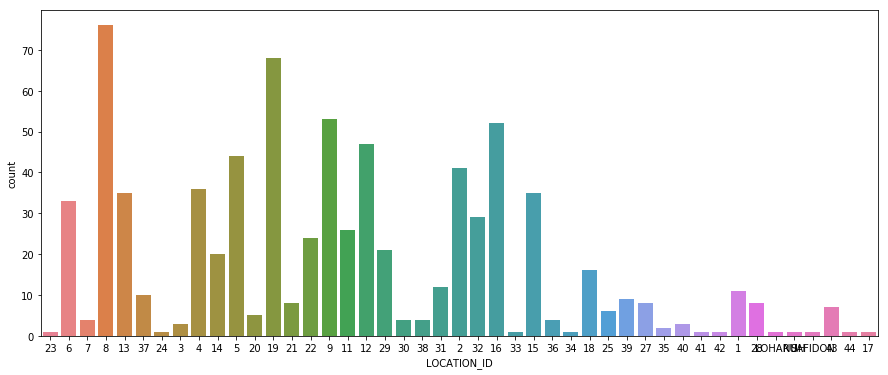

In [19]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='LOCATION_ID', data=df, palette ='husl')

In [20]:
drop_A=df.index[df["LOCATION_ID"] == 'SAFIDON'].tolist()
drop_B=df.index[df["LOCATION_ID"] == 'LOHARU'].tolist()
drop_C=df.index[df["LOCATION_ID"] == 'NUH'].tolist()
c =drop_A+drop_B+drop_C
df=df.drop(df.index[c])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 775
Data columns (total 31 columns):
Sector_score      772 non-null float64
LOCATION_ID       772 non-null object
PARA_A            772 non-null float64
Score_A           772 non-null float64
Risk_A            772 non-null float64
PARA_B            772 non-null float64
Score_B           772 non-null float64
Risk_B            772 non-null float64
TOTAL             772 non-null float64
numbers           772 non-null float64
Risk_C            772 non-null float64
Money_Value       772 non-null float64
Score_MV          772 non-null float64
Risk_D            772 non-null float64
District_Loss     772 non-null int64
RiSk_E            772 non-null float64
History           772 non-null int64
Prob              772 non-null float64
Risk_F            772 non-null float64
Score             772 non-null float64
Inherent_Risk     772 non-null float64
CONTROL_RISK      772 non-null float64
Detection_Risk    772 non-null float64
Aud

In [22]:
# df['Sector_score']=df['Sector_score'].astype(float)
df['LOCATION_ID']=df['LOCATION_ID'].astype(int)


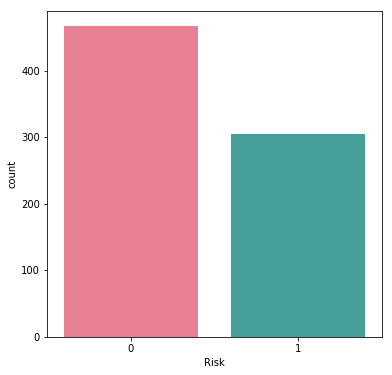

In [23]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Risk', data=df, palette ='husl')

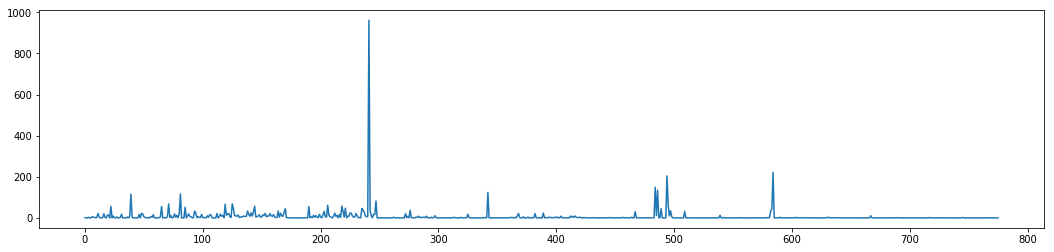

C:\Users\prava\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


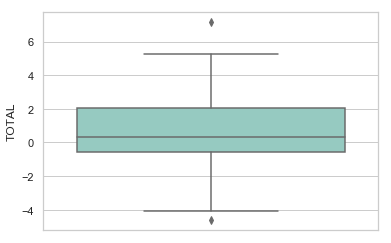

In [24]:
 plt.figure(figsize=(18,4))
# ax = sns.countplot(x='Audit_Risk', data=df, palette ='husl')

plt.plot(df.index,df['Audit_Risk'])
plt.show()
# plt.subplot(111)
# plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
log_tot= np.log(df['TOTAL'])
ax1 = sns.boxplot(y=log_tot, data=df, palette ='Set3')

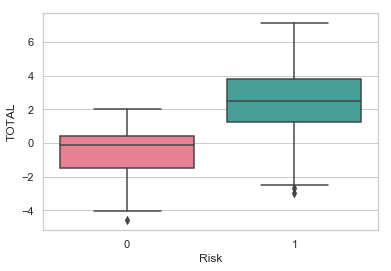

In [25]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(y=log_tot,x='Risk',data=df, palette ='husl')

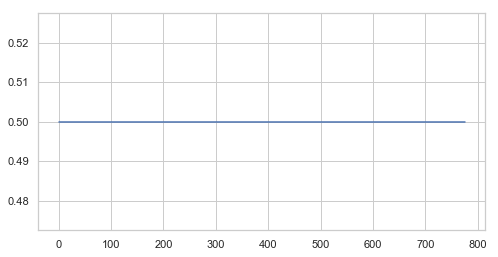

In [26]:
plt.figure(figsize=(8,4))
plt.plot(df.index,df['Detection_Risk'])
plt.show()

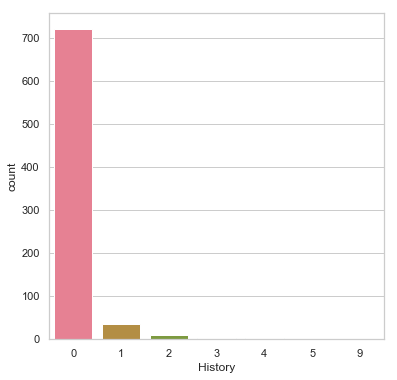

In [27]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='History', data=df, palette ='husl')

In [28]:
#dropping detection risk as it has constant value of 0.5
df = df.drop(['Detection_Risk'],1)
y_reg = df['Audit_Risk']

#PLOTTING SCATTER MATRIX

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D94C01240>,
      dtype=object)

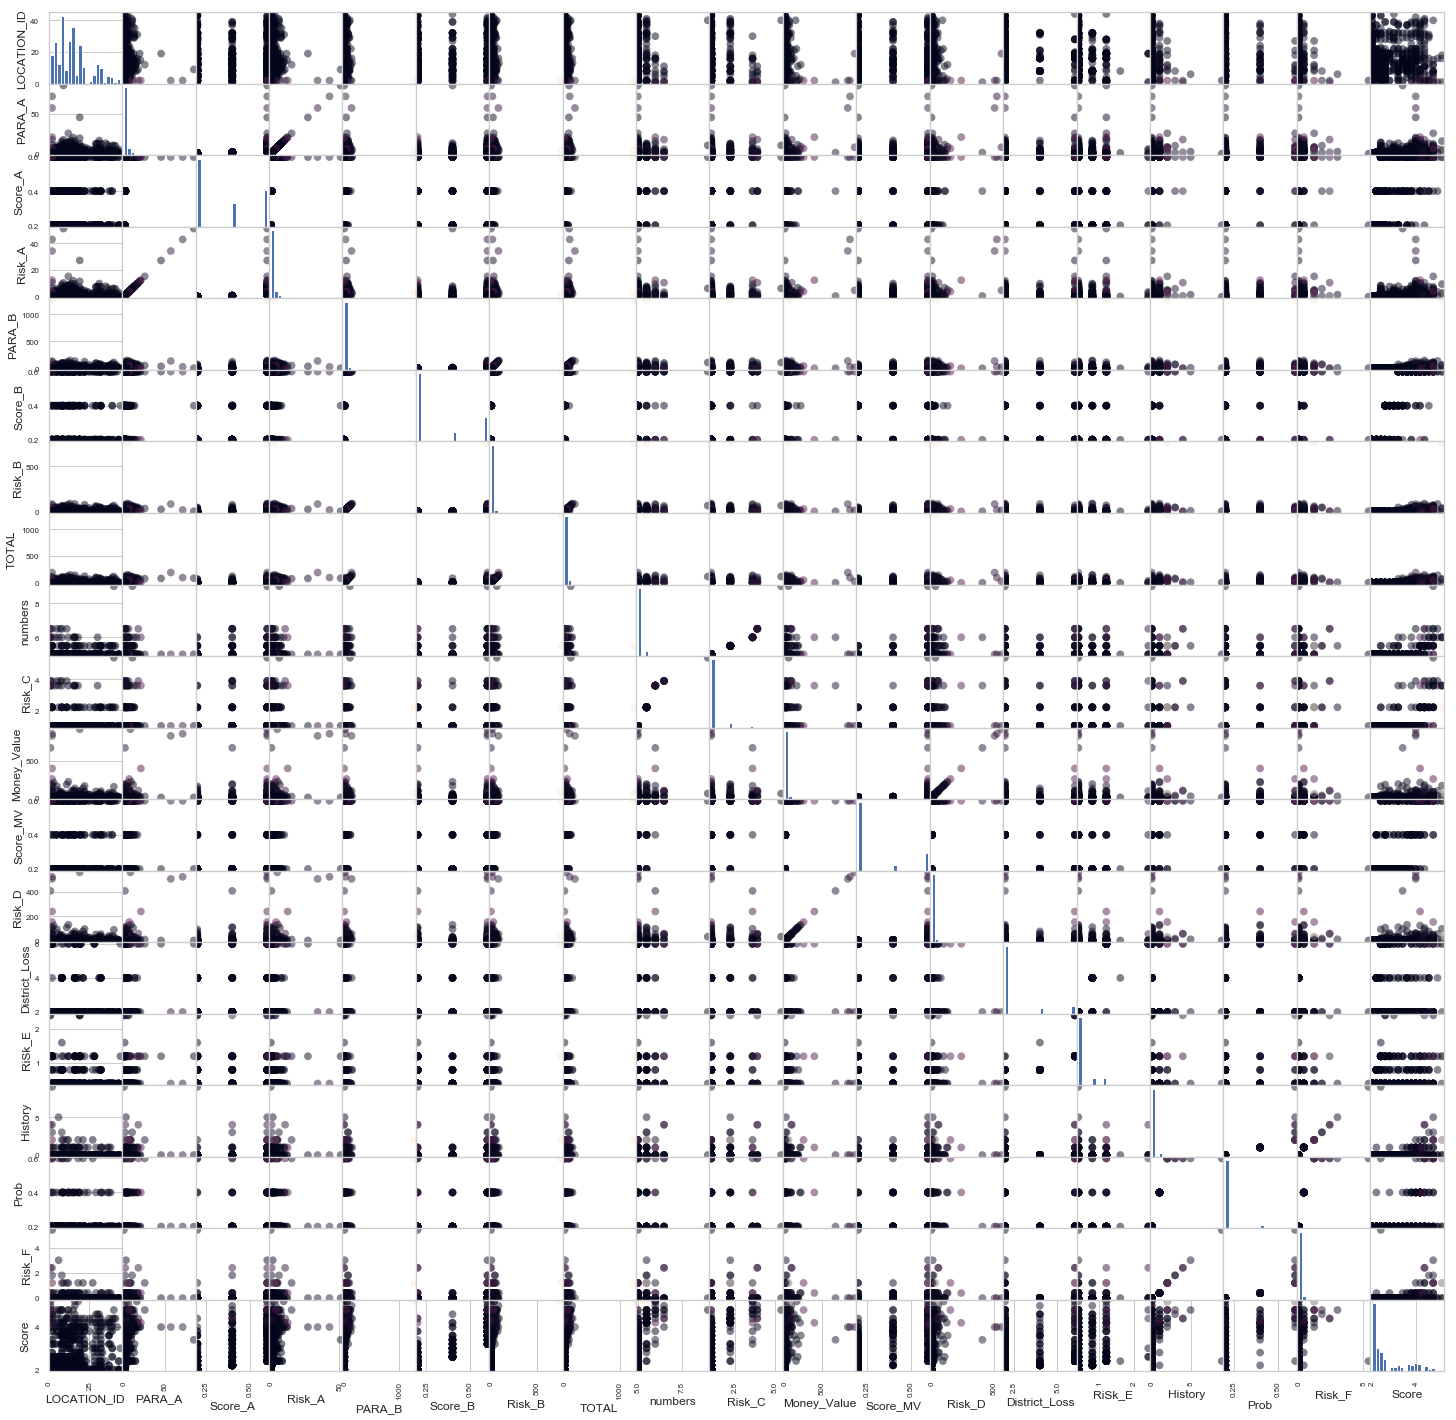

In [29]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import mglearn
x_plot1 = df.iloc[:,1:20]
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(x_plot1, c=y_reg, figsize=(25, 25),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.5) 
#                            cmap=mglearn.cm3)


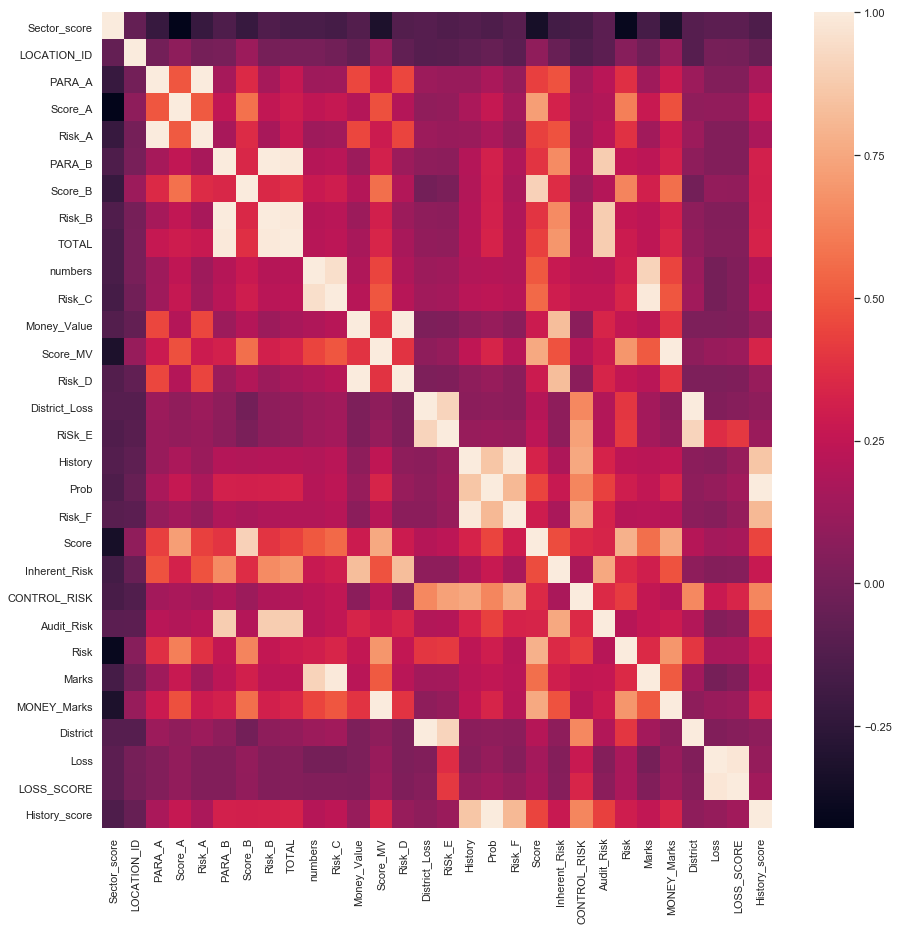

In [30]:
%matplotlib inline

import seaborn as sns; sns.set()
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr)

In [31]:
df = df.drop(['LOCATION_ID','Sector_score','PARA_A','PARA_B','TOTAL'],1)
df= df.drop(['History','Prob','District_Loss','Loss'],1)
y_reg = df['Audit_Risk']
x_reg = df.loc[:, df.columns != 'Audit_Risk']

In [32]:
columns = x_reg.columns
corr_list = [] 

for i in range(0,len(columns)-1):
   corr_list.append(np.corrcoef(x_reg.iloc[:,i] , y_reg)[0,1])

print(corr_list)

[0.20145840695822503, 0.22133720204845247, 0.2076182202003551, 0.8875507475265282, 0.22128099705517032, 0.24983615535839535, 0.3339566537600608, 0.2914663552935476, 0.3340589280850306, 0.20271061740634053, 0.3276417436258689, 0.33284508797760237, 0.7508623156424805, 0.3578249856488845, 0.21675404561641545, 0.25954481237635246, 0.2914663552935471, 0.1991508337744995, 0.07368890940705902]


## Scaling the dataset using MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trans_minmax = scaler.fit_transform(x_reg)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linreg_MM = LinearRegression()

scores_MM = cross_val_score(linreg_MM, X_trans_minmax, y_reg, cv=10)
print("Cross-validation scores: {}".format(scores_MM))
print("Average cross-validation score: {:.2f}".format(scores_MM.mean()))

Cross-validation scores: [ 7.51276746e-01 -1.74065345e-01 -1.63835127e+00  3.76693118e-01
  3.37010396e-01 -4.07800574e+01  3.98527171e-01  5.63829827e-01
 -1.18828720e+01 -1.85765989e+02]
Average cross-validation score: -23.78


# Scaling the dataset using StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trans_stanscal = sc.fit_transform(x_reg)

In [36]:
scores_SS = cross_val_score(linreg_MM, X_trans_stanscal, y_reg,cv=5)
print("Cross-validation scores: {}".format(scores_SS))
print("Average cross-validation score: {:.2f}".format(scores_SS.mean()))

Cross-validation scores: [-3.93088203e+20  4.36465445e-01 -4.71580660e-01  4.18124014e-01
 -2.68935453e+01]
Average cross-validation score: -78617640682819043328.00


Since cross validation score for Min Max Scaler model is much better than Standard Scaler model we will use MinMax Scaler as our scaling model.

# Train Validation Test Split

In [37]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_minmax, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 193



# KNeighbourRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

best_score = 0
for k in range(2,11):
    # train an KNeighbour Regressor
    knn_reg = KNeighborsRegressor(k)
    # perform cross-validation
    scores = cross_val_score(knn_reg, X_trainval, y_trainval, cv=10)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': k}

# rebuild a model on the combined training and validation set
knn_reg = KNeighborsRegressor(**best_parameters)
knn_reg.fit(X_trainval, y_trainval)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [39]:
test_score = knn_reg.score(X_test,y_test)
print("Test Accuracy: {:.2f}".format(test_score))
print("Best parameter: {}".format(best_parameters))

Test Accuracy: 0.18
Best parameter: {'n_neighbors': 5}


In [40]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [41]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)

In [42]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.57


In [44]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.000791,0.000591,0.001199,0.000398,6,{'n_neighbors': 6},0.723310,0.740723,0.559253,0.566419,...,0.622257,0.609443,0.579787,0.681107,0.629660,0.637368,0.660147,0.624590,0.630303,0.025772
5,0.001098,0.000299,0.001096,0.000298,7,{'n_neighbors': 7},0.695689,0.694349,0.580520,0.594022,...,0.591650,0.570303,0.544579,0.652843,0.604707,0.601719,0.623900,0.596235,0.596485,0.027561
6,0.000898,0.000299,0.001196,0.000398,8,{'n_neighbors': 8},0.668506,0.648769,0.599711,0.557599,...,0.552445,0.546314,0.525989,0.629116,0.581225,0.577817,0.601513,0.579398,0.572024,0.027761
7,0.000790,0.000596,0.001405,0.000484,9,{'n_neighbors': 9},0.646328,0.597623,0.578165,0.538302,...,0.523980,0.535695,0.508704,0.587839,0.551130,0.562747,0.583228,0.553045,0.549378,0.023478
8,0.000901,0.000301,0.001395,0.000663,10,{'n_neighbors': 10},0.640457,0.452102,0.581513,0.512288,...,0.507592,0.505671,0.483809,0.579431,0.531545,0.534616,0.553578,0.522045,0.525200,0.025403


Text(0.5,0,'k neighbours')

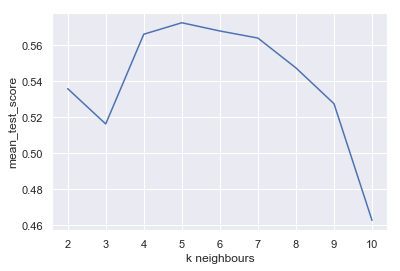

In [45]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['n_neighbors'])
sns.lineplot(y=results.mean_test_score,x=param_grid['n_neighbors'],data=data)
plt.xlabel('k neighbours')

In [46]:
# rebuild a model on the combined training and validation set
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
test_score = knn_reg.score(X_test,y_test)
print("Test Accuracy: {:.2f}".format(test_score))
print("Best parameter: {}".format(best_parameters))

Test Accuracy: 0.18
Best parameter: {'n_neighbors': 5}


# Linear Regression using Normal Equation

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()

scores =[]
for cv in  range(2,11):
    scores.append(cross_val_score(linreg, X_trans_minmax, y_reg, cv=cv).mean())
print("Cross-validation scores: {}".format(scores))
# print("Average cross-validation score: {:.2f}".format(np.mean(scores)))

Cross-validation scores: [-1.5958723866060475e+18, 0.444108194583346, -1498139293498965.2, -2278602509676079.5, -2.950385662110504, -6608640518952078.0, -8.103617951368942e+16, -2086096853037606.8, -23.781399737240683]


Text(0,0.5,'cross-validation scores')

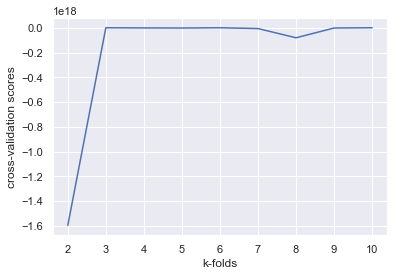

In [48]:
%matplotlib inline
cv = range(2,11)
data= pd.DataFrame(scores,np.array(cv))
sns.lineplot(y=scores,x=cv,data=data)
plt.xlabel('k-folds')
plt.ylabel('cross-validation scores')

In [49]:
# Linear Regression for kfold = 10

scores = cross_val_score(linreg, X_trans_minmax, y_reg, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 7.51276746e-01 -1.74065345e-01 -1.63835127e+00  3.76693118e-01
  3.37010396e-01 -4.07800574e+01  3.98527171e-01  5.63829827e-01
 -1.18828720e+01 -1.85765989e+02]
Average cross-validation score: -23.78


In [50]:
linreg.fit(X_trainval,y_trainval)

reg_score = linreg.score(X_test,y_test)
print("Test score: {}".format(reg_score))

Test score: 0.45036498604994224


# Ridge Regressor

In [51]:
x_range = [0.01, 0.05, 0.1, 0.5, 1,1.5, 5, 10, 50, 100]
param_grid = {'alpha': x_range}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]}


In [52]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)

In [53]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [54]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1.5}
Best cross-validation score: 0.70


In [55]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.045280,0.128201,0.001496,0.002900,0.01,{'alpha': 0.01},0.672168,0.808015,0.835916,0.624879,...,0.782614,0.788638,0.777158,0.800390,0.789267,0.793376,0.838335,0.785675,0.792839,0.016309
1,0.003987,0.004678,0.000895,0.000695,0.05,{'alpha': 0.05},0.664413,0.783991,0.825404,0.687105,...,0.778856,0.783739,0.774388,0.798413,0.785148,0.790374,0.832156,0.782328,0.789233,0.015599
2,0.002494,0.002152,0.000600,0.001202,0.1,{'alpha': 0.1},0.662639,0.769554,0.814923,0.736838,...,0.777301,0.780349,0.772940,0.796117,0.783264,0.788712,0.828803,0.780522,0.787198,0.015130
3,0.001298,0.001271,0.000700,0.001190,0.5,{'alpha': 0.5},0.674622,0.732044,0.790246,0.888885,...,0.770133,0.763029,0.763427,0.783953,0.775098,0.780438,0.816006,0.771833,0.777299,0.014337
4,0.000796,0.000596,0.000399,0.000489,1,{'alpha': 1},0.689264,0.716621,0.782712,0.942805,...,0.761328,0.747071,0.749677,0.773622,0.766247,0.771417,0.805577,0.762742,0.766907,0.015184


Text(0.5,0,'alpha')

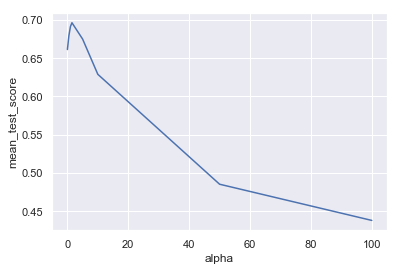

In [56]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['alpha'])
sns.lineplot(y=results.mean_test_score,x=param_grid['alpha'],data=data)
plt.xlabel('alpha')

In [57]:
# rebuild a model on the combined training and validation set
ridge = Ridge(alpha=1.5)
ridge.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Test score: 0.2544


# Lasso Regressor

In [58]:
x_range = [0.01, 0.05, 0.1, 0.5, 1,1.5, 5, 10, 50, 100]
param_grid = {'alpha': x_range}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]}


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)

In [60]:
grid_search.fit(X_trainval, y_trainval)

C:\Users\prava\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.05}
Best cross-validation score: 0.70


In [62]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.019645,0.035312,0.000499,0.000499,0.01,{'alpha': 0.01},0.696540,0.782820,0.834382,0.698419,...,0.775839,0.780891,0.772301,0.797745,0.781755,0.788752,0.827473,0.779363,0.786513,0.015214
1,0.003786,0.001245,0.000299,0.000457,0.05,{'alpha': 0.05},0.726236,0.737096,0.815040,0.856655,...,0.769776,0.767891,0.765388,0.791012,0.775596,0.781486,0.819736,0.773398,0.779270,0.015176
2,0.004089,0.001133,0.000299,0.000457,0.1,{'alpha': 0.1},0.741815,0.678267,0.778165,0.930963,...,0.754445,0.746384,0.747112,0.773589,0.761026,0.768389,0.798718,0.760020,0.762682,0.014398
3,0.000998,0.000447,0.000199,0.000399,0.5,{'alpha': 0.5},0.686243,0.581462,0.702889,0.264075,...,0.519281,0.424418,0.415376,0.445296,0.538473,0.543276,0.457131,0.533384,0.493527,0.048830
4,0.000798,0.000399,0.000000,0.000000,1,{'alpha': 1},0.516739,0.430927,0.482558,0.236698,...,0.271922,0.310612,0.295599,0.292636,0.307726,0.293487,0.263003,0.299472,0.290371,0.014113


Text(0.5,0,'alpha')

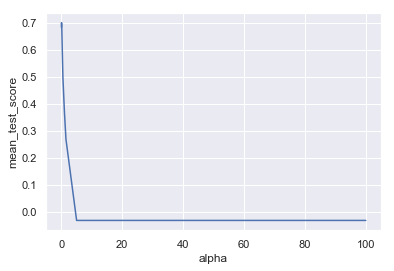

In [63]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['alpha'])
sns.lineplot(y=results.mean_test_score,x=param_grid['alpha'],data=data)
plt.xlabel('alpha')

In [64]:
# rebuild a model on the combined training and validation set
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
print('Test score: {:.4f}'.format(lasso_reg.score(X_test, y_test)))


Test score: 0.3555


# Polynomial Regressor

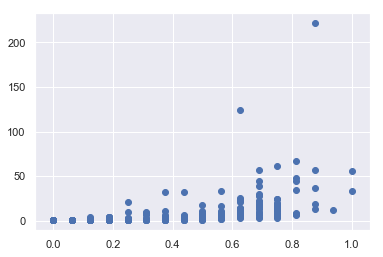

In [65]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,11].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()

In [67]:
scores_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_trainval_poly = poly.fit_transform(X_trainval)
    scores_list.append(cross_val_score(linreg, X_trainval_poly, y_trainval, cv=10).mean())


In [68]:
print("Cross-validation scores: {}".format(scores_list))

Cross-validation scores: [0.6425656842379143, 0.9345602884046439]


We see that we are getting better accuracy for polynomial degree = 2

In [69]:
# Rebuilding the model with polynomial degree 2
poly = PolynomialFeatures(2)
X_trainval_poly = poly.fit_transform(X_trainval)
X_test_poly = poly.transform(X_test)

linreg.fit(X_trainval_poly, y_trainval) 

# Score for model on testing dataset
test_score = linreg.score(X_test_poly,y_test)
print("Test Accuracy: {:.2f}".format(test_score))

Test Accuracy: 0.98


# Linear SVC

In [70]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}


In [71]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)

In [72]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000689,0.000451,0.000405,0.000496,0.001,0.001,"{'C': 0.001, 'epsilon': 0.001}",-0.122710,-0.126342,-0.175769,...,-0.067851,-0.073500,-0.071453,-0.080019,-0.072321,-0.071117,-0.085363,-0.075770,-0.073955,0.004917
1,0.000598,0.000489,0.000199,0.000399,0.001,0.01,"{'C': 0.001, 'epsilon': 0.01}",-0.122585,-0.126362,-0.175732,...,-0.067832,-0.073458,-0.071414,-0.080011,-0.072314,-0.071080,-0.085352,-0.075730,-0.073930,0.004921
2,0.000599,0.000489,0.000399,0.000489,0.001,0.1,"{'C': 0.001, 'epsilon': 0.1}",-0.123938,-0.127945,-0.177147,...,-0.068506,-0.074280,-0.072199,-0.080714,-0.073124,-0.071906,-0.086124,-0.076318,-0.074678,0.004913
3,0.000699,0.000458,0.000199,0.000398,0.001,1,"{'C': 0.001, 'epsilon': 1}",-0.142625,-0.141916,-0.193975,...,-0.076530,-0.082943,-0.080058,-0.090467,-0.081205,-0.079525,-0.096746,-0.084743,-0.083234,0.005754
4,0.000500,0.000500,0.000299,0.000457,0.001,10,"{'C': 0.001, 'epsilon': 10}",-0.176652,-0.169273,-0.226309,...,-0.092093,-0.098647,-0.097150,-0.109518,-0.096495,-0.095730,-0.116791,-0.100499,-0.099729,0.007226


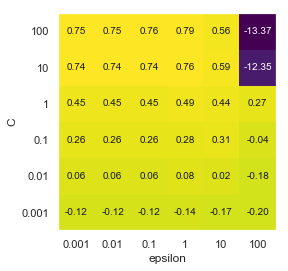

In [74]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='epsilon', xticklabels=param_grid['epsilon'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


In [75]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'epsilon': 1}
Best cross-validation score: 0.79


In [76]:
# rebuild the model on training+validation dataset
linsvr = LinearSVR(C=100,epsilon=1,random_state=0)
linsvr.fit(X_trainval,y_trainval)

# Score for model on testing dataset
test_score = linsvr.score(X_test,y_test)
print("Test Accuracy: {:.4f}".format(test_score))

Test Accuracy: 0.3475


# SVM with kernel

In [77]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [78]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVR(), param_grid, cv=10, return_train_score=True)

In [79]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [80]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.012868,0.001213,0.001094,0.000293,0.001,0.001,poly,"{'C': 0.001, 'epsilon': 0.001, 'kernel': 'poly'}",-0.163174,-0.163309,...,-0.085767,-0.092720,-0.090848,-0.102143,-0.091471,-0.090644,-0.108908,-0.092719,-0.093531,0.006467
1,0.015558,0.000654,0.001302,0.000455,0.001,0.001,rbf,"{'C': 0.001, 'epsilon': 0.001, 'kernel': 'rbf'}",-0.159189,-0.159655,...,-0.084095,-0.090911,-0.089032,-0.100041,-0.089622,-0.088774,-0.106663,-0.090734,-0.091622,0.006316
2,0.011171,0.000595,0.000897,0.000299,0.001,0.01,poly,"{'C': 0.001, 'epsilon': 0.01, 'kernel': 'poly'}",-0.163174,-0.162887,...,-0.086063,-0.092825,-0.091163,-0.102014,-0.091173,-0.090346,-0.108771,-0.092719,-0.093492,0.006402
3,0.016859,0.000692,0.001886,0.000535,0.001,0.01,rbf,"{'C': 0.001, 'epsilon': 0.01, 'kernel': 'rbf'}",-0.159189,-0.159515,...,-0.084391,-0.091016,-0.089347,-0.099913,-0.089372,-0.088520,-0.106526,-0.090954,-0.091630,0.006240
4,0.011471,0.000497,0.001192,0.000401,0.001,0.1,poly,"{'C': 0.001, 'epsilon': 0.1, 'kernel': 'poly'}",-0.163174,-0.160445,...,-0.085695,-0.092607,-0.090511,-0.101845,-0.090603,-0.089765,-0.108452,-0.093598,-0.093156,0.006491


In [81]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.78


In [82]:
# rebuild the model on training+validation dataset
svr = SVR(C=100,epsilon=0.1,kernel='rbf')
svr.fit(X_trainval,y_trainval)

# Score for model on testing dataset
test_score = svr.score(X_test,y_test)
print("Test Accuracy for SVR: {:.4f}".format(test_score))

Test Accuracy for SVR: 0.2419


#The best model for our Data is polynomial regressor with polynomial degree 2, The model has an accuracy of 98% 

# #                                                Classification

In [83]:
y_reg = df['Risk']
x_reg = df.loc[:, df.columns != 'Risk']

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trans_minmax = scaler.fit_transform(x_reg)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linreg_MM = LinearRegression()

scores_MM = cross_val_score(linreg_MM, X_trans_minmax, y_reg, cv=10)
print("Cross-validation scores: {}".format(scores_MM))
print("Average cross-validation score: {:.2f}".format(scores_MM.mean()))

Cross-validation scores: [ 0.71694734  0.35166674  0.73402814 -1.05075311  0.71510408  0.33567584
  0.74925717  0.70181431  0.54098042  0.58773222]
Average cross-validation score: 0.44


# Train Validation Test Split

In [86]:
from sklearn.model_selection import train_test_split
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_trans_minmax, y_reg, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 434   size of validation set: 145   size of test set: 193



# KNeighbour Classifier

In [87]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

In [89]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [90]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.97


In [91]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.001597,0.000486,0.001991,0.000451,6,{'n_neighbors': 6},0.982759,0.948276,0.982759,0.965517,...,0.967370,0.965451,0.971209,0.963532,0.969290,0.971209,0.969290,0.959770,0.967570,0.003569
5,0.002698,0.001953,0.003192,0.001473,7,{'n_neighbors': 7},0.982759,0.948276,0.965517,0.965517,...,0.961612,0.967370,0.971209,0.967370,0.963532,0.971209,0.967370,0.973180,0.967759,0.003729
6,0.002293,0.000455,0.002990,0.000995,8,{'n_neighbors': 8},0.982759,0.948276,0.965517,0.965517,...,0.967370,0.967370,0.971209,0.971209,0.961612,0.965451,0.961612,0.973180,0.967568,0.003695
7,0.001902,0.000944,0.002691,0.001000,9,{'n_neighbors': 9},0.982759,0.948276,0.965517,0.965517,...,0.969290,0.973129,0.965451,0.965451,0.965451,0.965451,0.967370,0.973180,0.967759,0.002958
8,0.001898,0.000833,0.002392,0.000794,10,{'n_neighbors': 10},0.982759,0.948276,0.982759,0.965517,...,0.967370,0.971209,0.961612,0.965451,0.959693,0.963532,0.961612,0.961686,0.964307,0.003229


Text(0.5,0,'k neighbours')

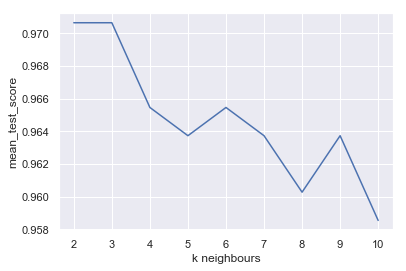

In [92]:
%matplotlib inline

data= pd.DataFrame(results.mean_test_score,param_grid['n_neighbors'])
sns.lineplot(y=results.mean_test_score,x=param_grid['n_neighbors'],data=data)
plt.xlabel('k neighbours')

In [93]:
# rebuild a model on the combined training and validation set with 2 neighbours
knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_trainval, y_trainval)

# model Accuracy on Testing set
test_score = knn_reg.score(X_test,y_test)
print("Test Accuracy: {:.2f}".format(test_score))

Test Accuracy: 0.87


In [94]:
pred_knn_reg = knn_reg.predict(X_test)
from sklearn.metrics import confusion_matrix

# confusion = confusion_matrix(y_test, pred_knn_reg)
# print("Confusion matrix:\n{}".format(confusion))

# Linear SVM

In [95]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [500,1000,1500,5000,7500, 10000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 1500, 5000, 7500, 10000]}


In [96]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, return_train_score=True)

In [97]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 1500, 5000, 7500, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001794,0.000602,0.000399,0.000488,0.001,500,"{'C': 0.001, 'max_iter': 500}",0.948276,0.913793,0.948276,...,0.917466,0.921305,0.921305,0.923225,0.925144,0.923225,0.919386,0.91954,0.921321,0.002258
1,0.001598,0.000665,0.000997,0.000891,0.001,1000,"{'C': 0.001, 'max_iter': 1000}",0.948276,0.913793,0.948276,...,0.917466,0.921305,0.921305,0.923225,0.925144,0.923225,0.919386,0.91954,0.921321,0.002258
2,0.002393,0.001115,0.000500,0.000500,0.001,1500,"{'C': 0.001, 'max_iter': 1500}",0.948276,0.913793,0.948276,...,0.917466,0.921305,0.921305,0.923225,0.925144,0.923225,0.919386,0.91954,0.921321,0.002258
3,0.001596,0.000489,0.000497,0.000497,0.001,5000,"{'C': 0.001, 'max_iter': 5000}",0.948276,0.913793,0.948276,...,0.917466,0.921305,0.921305,0.923225,0.925144,0.923225,0.919386,0.91954,0.921321,0.002258
4,0.002191,0.001244,0.000697,0.000640,0.001,7500,"{'C': 0.001, 'max_iter': 7500}",0.948276,0.913793,0.948276,...,0.917466,0.921305,0.921305,0.923225,0.925144,0.923225,0.919386,0.91954,0.921321,0.002258


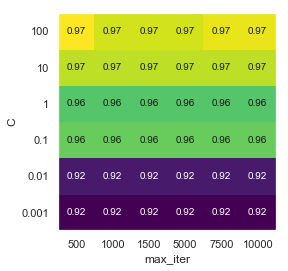

In [99]:
%matplotlib inline
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='max_iter', xticklabels=param_grid['max_iter'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


In [100]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'max_iter': 500}
Best cross-validation score: 0.97


In [101]:
# rebuild the model on training+validation dataset
linsvc = LinearSVC(C=100,random_state=0,max_iter=500)
linsvc.fit(X_trainval,y_trainval)

# Score for model on testing dataset
test_score = linsvc.score(X_test,y_test)
print("Test Accuracy: {:.4f}".format(test_score))

Test Accuracy: 0.9637


In [102]:
pred_linsvc = linsvc.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_linsvc)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[116   2]
 [  5  70]]


# SVC with kernel

In [103]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['poly', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']}


In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=10, return_train_score=True)

In [105]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [106]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011259,0.001273,0.001197,0.000601,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.603448,0.603448,...,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.603448,0.602763,0.000228
1,0.014257,0.001842,0.002194,0.001074,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.603448,0.603448,...,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.603448,0.602763,0.000228
2,0.009968,0.002394,0.001508,0.001137,0.001,0.01,poly,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}",0.603448,0.603448,...,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.603448,0.602763,0.000228
3,0.015358,0.002246,0.001994,0.001099,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.603448,0.603448,...,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.603448,0.602763,0.000228
4,0.009474,0.002658,0.001488,0.001023,0.001,0.1,poly,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}",0.603448,0.603448,...,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.602687,0.603448,0.602763,0.000228


In [107]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'gamma': 100, 'kernel': 'poly'}
Best cross-validation score: 0.98


In [108]:
# rebuild the model on training+validation dataset
svr = SVC(C=0.1,gamma=100,kernel='poly')
svr.fit(X_trainval,y_trainval)

# Score for model on testing dataset
test_score = svr.score(X_test,y_test)
print("Test Accuracy for SVR: {:.4f}".format(test_score))

Test Accuracy for SVR: 0.9793


In [109]:
pred_svr = svr.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svr)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[116   2]
 [  2  73]]


# Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C' : c_range}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [114]:
#taking C=10
logreg = LogisticRegression(C=10)

logreg.fit(X_trainval, y_trainval)
print("Train_Score: {}".format(logreg.score(X_train, y_train)))
print("Test_Score: {}".format(logreg.score(X_test, y_test)))

Train_Score: 0.9608294930875576
Test_Score: 0.9637305699481865


In [129]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.96


In [131]:
# rebuild the model on training+validation dataset
log_reg = LogisticRegression(C=1,random_state=0)
log_reg.fit(X_trainval,y_trainval)

# Score for model on testing dataset
test_score = log_reg.score(X_test,y_test)
print("Test Accuracy for SVR: {:.4f}".format(test_score))

Test Accuracy for SVR: 0.9585


In [133]:
pred_log_reg = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log_reg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[115   3]
 [  5  70]]


# Decision Tree

In [115]:
param_grid = {'max_depth': [2,3,4 ]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [2, 3, 4]}


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [117]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [118]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 1.00


In [120]:
# rebuild the model on training+validation dataset
dtree = DecisionTreeClassifier(max_depth=2,random_state=0)
dtree.fit(X_trainval,y_trainval)

# Score for model on testing dataset
test_score = dtree.score(X_test,y_test)
print("Test Accuracy for SVR: {:.4f}".format(test_score))

Test Accuracy for SVR: 1.0000


In [121]:
pred_dtree = svr.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[116   2]
 [  2  73]]


In [135]:
print("\nLinearSVC:")
print(confusion_matrix(y_test, pred_linsvc))
print("\nSVC with kernel")
print(confusion_matrix(y_test, pred_svr))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_dtree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_log_reg))


LinearSVC:
[[116   2]
 [  5  70]]

SVC with kernel
[[116   2]
 [  2  73]]

Decision tree:
[[116   2]
 [  2  73]]

Logistic Regression
[[115   3]
 [  5  70]]
